# Segmentação de clientes de um supermercado

Um supermercado, através de cartões de fidelidade, possui alguns dados básicos sobre seus clientes, como idade, gênero, renda anual e pontuação de gastos. Tal pontuação é algo que o supermercado atribui ao cliente com base em parâmetros definidos, como comportamento do cliente e dados de compra.

O objetivo deste projeto é segmentar os clientes com base em seus dados de compra, para que o supermercado possa entender melhor os clientes e formular estratégias de negócios de acordo.

Link original para o dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Estrutura de pastas do projeto:

```bash
├── README.md
├── dados
│   ├── Mall_Customers.csv
├── notebooks
│   └── projeto_supermercado_01_eda.ipynb
│   └── ...
├── reports
│   └── ...
```

In [6]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")


Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.8.0
NumPy                |     1.26.4
Pandas               |      2.1.4
Scikit-Learn         |      1.3.2
Seaborn              |     0.12.2

Versão do Python: 3.11.7


In [7]:

DADOS = '../dados/Mall_Customers.csv'

df = pd.read_csv(DADOS)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
with pd.option_context('display.float_format','{:.2f}'.format):
    display(df.describe())


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [11]:
df.describe(exclude='number')

,Gender
count,200
unique,2
top,Female
freq,112


In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)

profile.to_file("../reports/eda_supermercado.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- Utilizando o ydata_ptofiling podemos ver um histomgrama sobre a idade(Age) máxima e mínima dessa base de dados, veremos também  a pontuação de gastos(Spending Score) percebemos que o maior acúmulo esta na faixa 40 a 60, fora isso podemos ver agumas correlações entre as colunas desta base

In [22]:
df_analise =  df.copy()
df_analise = df_analise.drop('CustomerID', axis=1)

df_analise.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


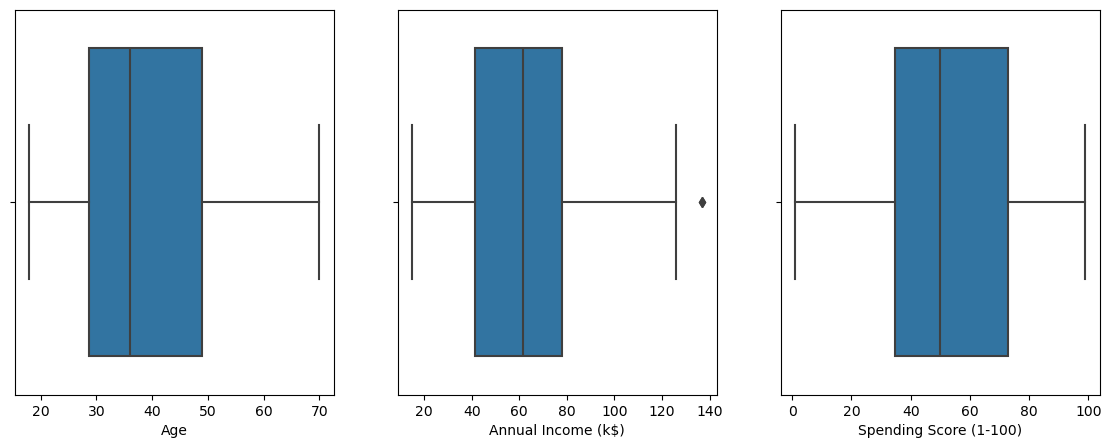

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

for ax, col in zip(axs, df_analise.select_dtypes('number')):
    sns.boxplot(data=df_analise, x=col, ax=ax)

plt.show()

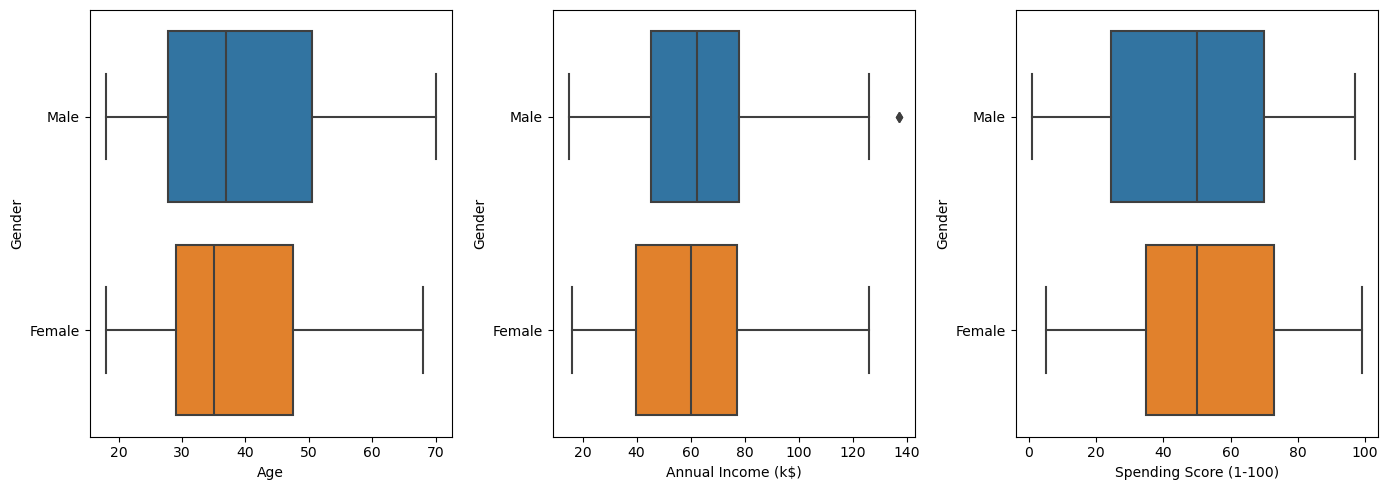

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 5),tight_layout=True)

for ax, col in zip(axs, df_analise.select_dtypes('number')):
    sns.boxplot(data=df_analise, x=col, y='Gender', ax=ax)

plt.show()

- Nesse boxplot podemos procurar por outliers e analisar a média de pontuação por gênero masculino(Male) e feminino(Female)

In [26]:
df_analise.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [27]:
with pd.option_context('display.float_format','{:.3f}'.format):
    display(df_analise.corr(numeric_only=True, method='spearman'))

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000,0.020,-0.345
Annual Income (k$),0.020,1.000,0.008
Spending Score (1-100),-0.345,0.008,1.000


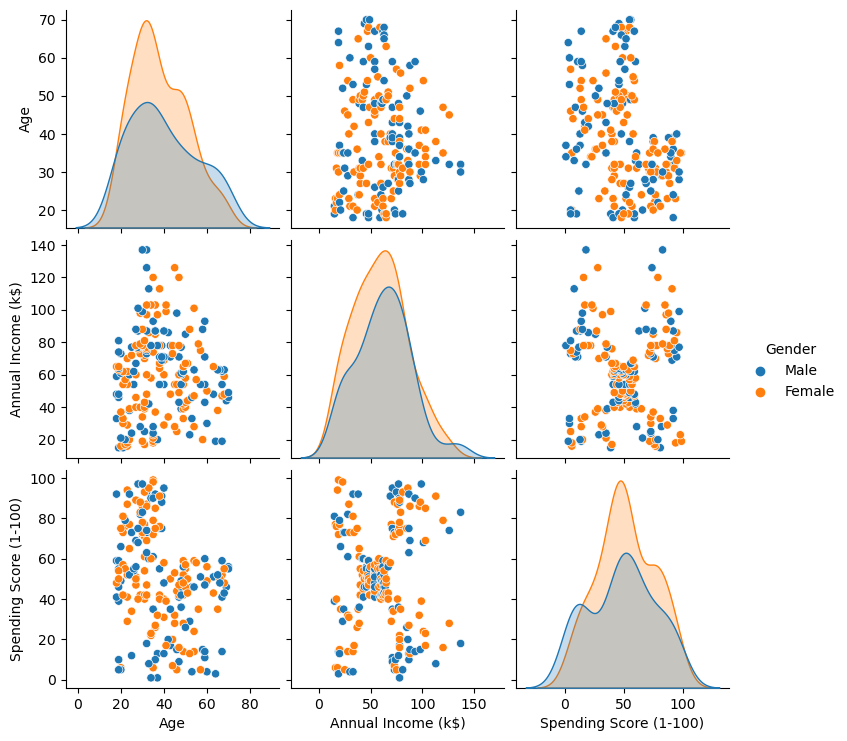

In [28]:
sns.pairplot(df_analise, diag_kind='kde', hue='Gender');

- Neste pairplot podemos ver todos os gráficos gerados no ydata_profiling, porém todos estão na mesma imagem lado a lado facilitando a visualização.
- Os graficos na diagonal são os histograma fazendo a correlação entre Feminino(Female) e Masculino(Male)
- Os gráficos fora da diagonal são gráficos de dispersão (scatter plots), representando a relação entre pares de variáveis, como 'Feminino (Female)' e 'Masculino (Male)'. Esses gráficos ajudam a identificar possíveis padrões, tendências ou correlações.

In [54]:
df_analise.to_csv('../dados/Mall_Costumers_no_costumerID.csv', index=False)